<a href="https://colab.research.google.com/github/ZahraShourmeij/Transformers/blob/master/bert_add_testset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget -nc https://www.dropbox.com/scl/fi/354euga39eauii3ngp9u5/EXIST2021_training.tsv?rlkey=hjubyx1q7z8aizyx1hufnsi91&dl=0
!wget -nc https://www.dropbox.com/scl/fi/hm7vpjtv1ztoxq8tqxkgl/EXIST2021_test_labeled.tsv?rlkey=alf55uwkw5yf1lpr77sth5c6a&dl=0

!pip install transformers
!pip install datasets
!pip install torchinfo
!pip install accelerate -U

import pandas as pd
import numpy as np
import torch
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix
from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer, TrainingArguments, pipeline
from torchinfo import summary
import seaborn as sns
from datasets import load_dataset

# Read the training dataset
df_train = pd.read_csv('EXIST2021_training.tsv?rlkey=hjubyx1q7z8aizyx1hufnsi91', sep="\t")
df_train = df_train[['task1','text']]
df_train['target'] = df_train['task1'].map({'sexist': 1, 'non-sexist': 0})

df1_train = df_train[['text','target']]
df1_train.columns = ['sentence','label']

# Save the training dataset
df1_train.to_csv('train_data.csv', index=False)

# Tokenization function
def tokenize_fn(batch):
    return tokenizer(batch['sentence'], truncation=True)

# Tokenize the training dataset
tokenizer = AutoTokenizer.from_pretrained('bert-base-cased')
train_dataset = load_dataset('csv', data_files='train_data.csv')
tokenized_train_dataset = train_dataset.map(tokenize_fn, batched=True)




# Load the additional test dataset
df_test = pd.read_csv('EXIST2021_test_labeled.tsv?rlkey=alf55uwkw5yf1lpr77sth5c6a', sep="\t")

df_test = df_test[['task1','text']]
df_test['target'] = df_test['task1'].map({'sexist': 1, 'non-sexist': 0})

df1_test = df_test[['text','target']]
df1_test.columns = ['sentence','label']

# Save the training dataset
df1_test.to_csv('test_data.csv', index=False)

# Tokenize the additional test dataset
test_dataset = load_dataset('csv', data_files='test_data.csv')
tokenized_test_dataset = test_dataset.map(tokenize_fn, batched=True)


# Model initialization
model = AutoModelForSequenceClassification.from_pretrained('bert-base-cased', num_labels=2)
summary(model)

# Training arguments
training_args = TrainingArguments(
    output_dir='training_dir',
    evaluation_strategy='epoch',
    save_strategy='epoch',
    num_train_epochs=3,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=64,
)

# Compute metrics function
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    acc = accuracy_score(labels, predictions)
    f1 = f1_score(labels, predictions, average='micro')
    return {'accuracy': acc, 'f1': f1}

# Trainer initialization
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_train_dataset['train'],
    eval_dataset=tokenized_test_dataset['train'],
    tokenizer=tokenizer,
    compute_metrics=compute_metrics,
)

# Training
trainer.train()

--2024-04-07 19:28:27--  https://www.dropbox.com/scl/fi/354euga39eauii3ngp9u5/EXIST2021_training.tsv?rlkey=hjubyx1q7z8aizyx1hufnsi91
Resolving www.dropbox.com (www.dropbox.com)... 162.125.64.18, 2620:100:6018:18::a27d:312
Connecting to www.dropbox.com (www.dropbox.com)|162.125.64.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://uce63221ea30f1b110fe95a31413.dl.dropboxusercontent.com/cd/0/inline/CQnwwXHSEkakF6hbGByslxPk43szeJOcd0xoFP1AJnM2FPw_boGvYd7g5g1GEbzhEg29OnWdSC04oTM8Cg44HsQZqRWeDsvc4Y4IfI4fYXCgwp1JFwvmuvrVyncaniDs-0TZk6D63OLtXLOpBa1XoAeX/file# [following]
--2024-04-07 19:28:28--  https://uce63221ea30f1b110fe95a31413.dl.dropboxusercontent.com/cd/0/inline/CQnwwXHSEkakF6hbGByslxPk43szeJOcd0xoFP1AJnM2FPw_boGvYd7g5g1GEbzhEg29OnWdSC04oTM8Cg44HsQZqRWeDsvc4Y4IfI4fYXCgwp1JFwvmuvrVyncaniDs-0TZk6D63OLtXLOpBa1XoAeX/file
Resolving uce63221ea30f1b110fe95a31413.dl.dropboxusercontent.com (uce63221ea30f1b110fe95a31413.dl.dropboxusercontent.com)... 162.125.

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/436k [00:00<?, ?B/s]

Generating train split: 0 examples [00:00, ? examples/s]

Map:   0%|          | 0/6977 [00:00<?, ? examples/s]

Generating train split: 0 examples [00:00, ? examples/s]

Map:   0%|          | 0/4368 [00:00<?, ? examples/s]

model.safetensors:   0%|          | 0.00/436M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/accelerate/accelerator.py:436: FutureWarning: Passing the following arguments to `Accelerator` is deprecated and will be removed in version 1.0 of Accelerate: dict_keys(['dispatch_batches', 'split_batches', 'even_batches', 'use_seedable_sampler']). Please pass an `accelerate.DataLoaderConfiguration` instead: 
dataloader_config = DataLoaderConfiguration(dispatch_batches=None, split_batches=False, even_batches=True, use_seedable_sampler=True)
  warnings.warn(


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,No log,0.581525,0.717949,0.717949
2,0.614700,0.552021,0.747024,0.747024
3,0.417900,0.757875,0.734203,0.734203


TrainOutput(global_step=1311, training_loss=0.45454533603880626, metrics={'train_runtime': 814.8335, 'train_samples_per_second': 25.687, 'train_steps_per_second': 1.609, 'total_flos': 1461104509848180.0, 'train_loss': 0.45454533603880626, 'epoch': 3.0})

In [3]:
# Check data types
print("Data type of test_true_labels:", type(test_true_labels[0]))
print("Data type of test_pred_labels:", type(test_pred_labels[0]))

# Convert data types if necessary
# For example, if test_true_labels are strings and test_pred_labels are numbers
# Convert test_true_labels to numbers or vice versa

# Sample print to debug
print("Sample of test_true_labels:", test_true_labels[:5])
print("Sample of test_pred_labels:", test_pred_labels[:5])


Data type of test_true_labels: <class 'numpy.int64'>
Data type of test_pred_labels: <class 'str'>
Sample of test_true_labels: 0    0
1    0
2    1
3    1
4    0
Name: target, dtype: int64
Sample of test_pred_labels: ['LABEL_0', 'LABEL_0', 'LABEL_1', 'LABEL_1', 'LABEL_0']


In [4]:
# Convert test_pred_labels from strings to integers
test_pred_labels_int = [int(label.split('_')[-1]) for label in test_pred_labels]

# Now both test_true_labels and test_pred_labels_int are represented as integers
test_f1 = f1_score(test_true_labels, test_pred_labels_int, average='micro')

In [6]:
# Print a sample of test_true_labels and test_pred_labels_int for debugging
print("Sample of test_true_labels:", test_true_labels[:5])
print("Sample of test_pred_labels_int:", test_pred_labels_int[:5])

# Check the unique values in test_pred_labels_int to ensure they are integers
print("Unique values in test_pred_labels_int:", set(test_pred_labels_int))

# Check the shape of test_true_labels and test_pred_labels_int to ensure they match
print("Shape of test_true_labels:", test_true_labels.shape)
print("Shape of test_pred_labels_int:", len(test_pred_labels_int))


Sample of test_true_labels: 0    0
1    0
2    1
3    1
4    0
Name: target, dtype: int64
Sample of test_pred_labels_int: [0, 0, 1, 1, 0]
Unique values in test_pred_labels_int: {0, 1}
Shape of test_true_labels: (4368,)
Shape of test_pred_labels_int: 4368


Accuracy on Test Dataset: 0.7339743589743589
F1 Score on Test Dataset: 0.7339743589743589


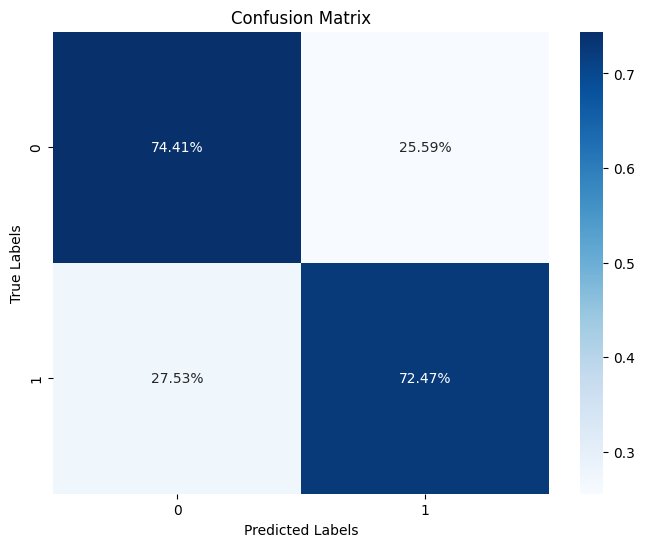

In [9]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate metrics on additional test dataset
test_true_labels = df_test['target']
test_accuracy = accuracy_score(test_true_labels, test_pred_labels_int)  # Use test_pred_labels_int
test_f1 = f1_score(test_true_labels, test_pred_labels_int, average='micro')  # Use test_pred_labels_int

print("Accuracy on Test Dataset:", test_accuracy)
print("F1 Score on Test Dataset:", test_f1)

# Plot confusion matrix for additional test dataset
cm = confusion_matrix(test_true_labels, test_pred_labels_int, normalize='true')
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt=".2%", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()
